In [190]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
# Loading dataset
admin_data = pd.read_csv('Admin.csv')
lab_data = pd.read_csv('Labs.csv')

In [192]:
admin_data

,ID,Med,Admin Date,Units
0,1,Med A,02/07/2012,"1,500.00"
1,1,Med A,06/07/2012,"1,500.00"
2,1,Med A,09/07/2012,"1,500.00"
3,1,Med A,11/07/2012,"1,500.00"
4,1,Med A,13/07/2012,"1,500.00"
...,...,...,...,...
2017,129,Med A,27/08/2012,"5,200.00"
2018,129,Med A,30/08/2012,"5,200.00"
2019,129,Med A,04/09/2012,"5,200.00"
2020,129,Med A,06/09/2012,"6,500.00"


In [193]:
lab_data

,ID,DRAW_DATE,LAB_RESULT_CODE,LAB_VALUE
0,1.0,04-Jul,LAB A,679
1,1.0,01-Aug,LAB A,621
2,1.0,05-Sep,LAB A,915
3,1.0,03-Oct,LAB A,848
4,1.0,07-Nov,LAB A,845
...,...,...,...,...
2392,129.0,16-Aug,LAB B,10.0
2393,129.0,04-Sep,LAB B,9.4
2394,129.0,05-Jul,LAB C,36
2395,129.0,02-Aug,LAB C,39


In [194]:
admin_data.describe()

,ID
count,2022.000000
mean,66.767557
std,37.973341
min,1.000000
25%,32.250000
50%,67.000000
75%,100.000000
max,129.000000


In [195]:
lab_data.describe()

,ID
count,2095.000000
mean,65.557041
std,38.453118
min,1.000000
25%,31.000000
50%,66.000000
75%,99.000000
max,129.000000


In [196]:
admin_data.isnull().sum()

ID            0
Med           0
Admin Date    0
Units         0
dtype: int64

In [197]:
lab_data.isnull().sum()

ID                 302
DRAW_DATE            0
LAB_RESULT_CODE      0
LAB_VALUE            0
dtype: int64

In [205]:
admin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2022 non-null   int64 
 1   Med         2022 non-null   object
 2   Admin Date  2022 non-null   object
 3   Units       2022 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.3+ KB


In [206]:
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2095 non-null   float64
 1   DRAW_DATE        2397 non-null   object 
 2   LAB_RESULT_CODE  2397 non-null   object 
 3   LAB_VALUE        2397 non-null   object 
dtypes: float64(1), object(3)
memory usage: 75.0+ KB


In [210]:
# Converting Units and Lab_Value to numerical
admin_data['Units'] = pd.to_numeric(admin_data['Units'], errors='coerce')

In [212]:
admin_data.isnull().sum()

ID               0
Med              0
Admin Date       0
Units         1647
dtype: int64

In [214]:
lab_data['LAB_VALUE'] = pd.to_numeric(lab_data['LAB_VALUE'], errors='coerce')

In [215]:
lab_data

,ID,DRAW_DATE,LAB_RESULT_CODE,LAB_VALUE
0,1.0,04-Jul,LAB A,679.0
1,1.0,01-Aug,LAB A,621.0
2,1.0,05-Sep,LAB A,915.0
3,1.0,03-Oct,LAB A,848.0
4,1.0,07-Nov,LAB A,845.0
...,...,...,...,...
2392,129.0,16-Aug,LAB B,10.0
2393,129.0,04-Sep,LAB B,9.4
2394,129.0,05-Jul,LAB C,36.0
2395,129.0,02-Aug,LAB C,39.0


In [216]:
lab_data.isnull().sum()

ID                 302
DRAW_DATE            0
LAB_RESULT_CODE      0
LAB_VALUE            3
dtype: int64

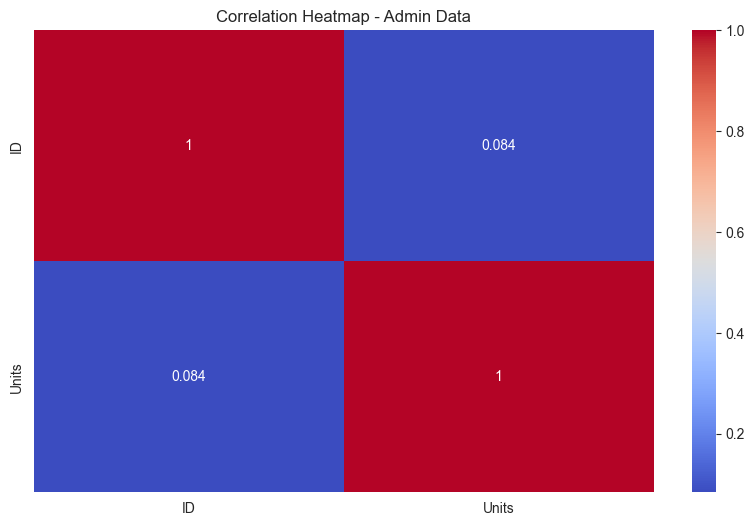

In [217]:
numeric_admin_df = admin_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_admin_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Admin Data')
plt.show()

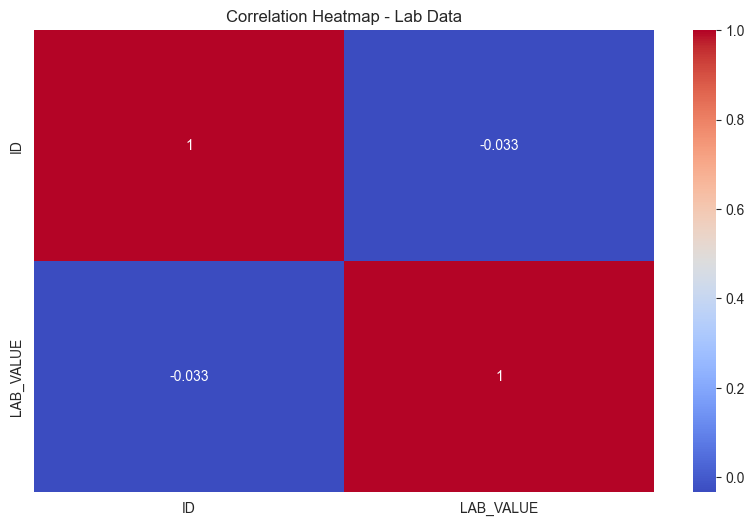

In [218]:
numeric_lab_df = lab_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_lab_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Lab Data')
plt.show()

In [219]:
merged_df = pd.merge(admin_data, lab_data, on='ID')

In [220]:
merged_df

,ID,Med,Admin Date,Units,DRAW_DATE,LAB_RESULT_CODE,LAB_VALUE
0,1,Med A,02/07/2012,NaN,04-Jul,LAB A,679.0
1,1,Med A,02/07/2012,NaN,01-Aug,LAB A,621.0
2,1,Med A,02/07/2012,NaN,05-Sep,LAB A,915.0
3,1,Med A,02/07/2012,NaN,03-Oct,LAB A,848.0
4,1,Med A,02/07/2012,NaN,07-Nov,LAB A,845.0
...,...,...,...,...,...,...,...
40814,129,Med B,13/09/2012,10.0,16-Aug,LAB B,10.0
40815,129,Med B,13/09/2012,10.0,04-Sep,LAB B,9.4
40816,129,Med B,13/09/2012,10.0,05-Jul,LAB C,36.0
40817,129,Med B,13/09/2012,10.0,02-Aug,LAB C,39.0


In [221]:
merged_df.isnull().sum()

ID                     0
Med                    0
Admin Date             0
Units              33181
DRAW_DATE              0
LAB_RESULT_CODE        0
LAB_VALUE             14
dtype: int64

In [222]:
merged_df.dropna(inplace=True)

In [223]:
merged_df.isnull().sum()

ID                 0
Med                0
Admin Date         0
Units              0
DRAW_DATE          0
LAB_RESULT_CODE    0
LAB_VALUE          0
dtype: int64

In [224]:
merged_df

,ID,Med,Admin Date,Units,DRAW_DATE,LAB_RESULT_CODE,LAB_VALUE
598,1,Med B,12/09/2012,4.0,04-Jul,LAB A,679.0
599,1,Med B,12/09/2012,4.0,01-Aug,LAB A,621.0
600,1,Med B,12/09/2012,4.0,05-Sep,LAB A,915.0
601,1,Med B,12/09/2012,4.0,03-Oct,LAB A,848.0
602,1,Med B,12/09/2012,4.0,07-Nov,LAB A,845.0
...,...,...,...,...,...,...,...
40814,129,Med B,13/09/2012,10.0,16-Aug,LAB B,10.0
40815,129,Med B,13/09/2012,10.0,04-Sep,LAB B,9.4
40816,129,Med B,13/09/2012,10.0,05-Jul,LAB C,36.0
40817,129,Med B,13/09/2012,10.0,02-Aug,LAB C,39.0


In [225]:
# Now train a model on merged_df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [226]:
X = merged_df[['Units']]
y = merged_df['LAB_VALUE']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [228]:
model = LinearRegression()

In [229]:
model.fit(X_train, y_train)

LinearRegression()

In [230]:
model.score(X_test, y_test)

-0.0030956735246425726

In [233]:
prediction = model.predict(X_test)

In [236]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [238]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('R2 Score:', r2_score(y_test, prediction))

Mean Absolute Error: 283.25049268420173
Mean Squared Error: 158507.71949857273
R2 Score: -0.0030956735246425726


In [239]:
# Using other models
from sklearn.ensemble import RandomForestRegressor

In [240]:
model = RandomForestRegressor()

In [241]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [242]:
model.score(X_test, y_test)

0.004405630500459501

In [243]:
prediction = model.predict(X_test)

In [244]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('R2 Score:', r2_score(y_test, prediction))

Mean Absolute Error: 282.3503643653474
Mean Squared Error: 157322.37434589502
R2 Score: 0.004405630500459501


In [245]:
from sklearn.ensemble import GradientBoostingRegressor

In [246]:
model = GradientBoostingRegressor()

In [247]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [248]:
model.score(X_test, y_test)

0.004686005109703517

In [249]:
prediction = model.predict(X_test)

In [250]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('R2 Score:', r2_score(y_test, prediction))

Mean Absolute Error: 282.76611682723103
Mean Squared Error: 157278.0699578994
R2 Score: 0.004686005109703517


In [252]:
from sklearn.linear_model import Lasso

In [253]:
model = Lasso()

In [254]:
model.fit(X_train, y_train)

Lasso()

In [255]:
model.score(X_test, y_test)

-0.0030953158012907434

In [256]:
prediction = model.predict(X_test)

In [257]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('R2 Score:', r2_score(y_test, prediction))

Mean Absolute Error: 283.25052652475637
Mean Squared Error: 158507.6629716489
R2 Score: -0.0030953158012907434


In [258]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [264]:
# Hyperparameter tuning for RandomForestRegressor
para_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}


In [265]:
random_forest = RandomForestRegressor()

In [266]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=para_grid, cv=5)

In [267]:
grid_search.fit(X_train, y_train)

D:\Machine_Learning\ML_Practicals\Medical-Trail-Dataset\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Machine_Learning\ML_Practicals\Medical-Trail-Dataset\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Machine_Learning\ML_Practicals\Medical-Trail-Dataset\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Machine_Learning\ML_Practicals\Medical-Trail-Dataset\.venv\li

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [268]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 100}

In [269]:
grid_search.best_score_

np.float64(0.0012337360255466833)

In [271]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5)

In [273]:
pred = grid_search.predict(X_test)

In [274]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R2 Score:', r2_score(y_test, pred))

Mean Absolute Error: 283.48372121950774
Mean Squared Error: 157221.91438897853
R2 Score: 0.005041378389989415
